#%% [markdown]

 # Zadanie na 3 - przygotowanie próbek

In [ ]:
n_samples=250
X,t=make_classification(n_samples=n_samples,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=254479)
X_moons,t_moons=make_moons(n_samples=n_samples,random_state=254479)
X_train,X_test,y_train,y_test=train_test_split(X,t,test_size=0.5)
X_train_moons,X_test_moons,y_train_moons,y_test_moons=train_test_split(X_moons,t_moons,test_size=0.5)

#Standaryzacja
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_train_moons=scaler.fit_transform(X_train_moons)
X_test_moons=scaler.transform(X_test_moons)

#%% [markdown]

 # Zadanie na 3 - scikitowa implementacja liniowego SVM
Klasyfikacja

ACCURACY dla  implementacji sklearn: 0.984


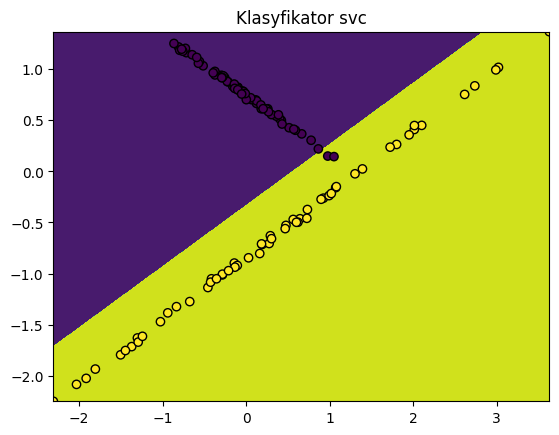

ACCURACY dla moons w implementacji sklearn: 0.864


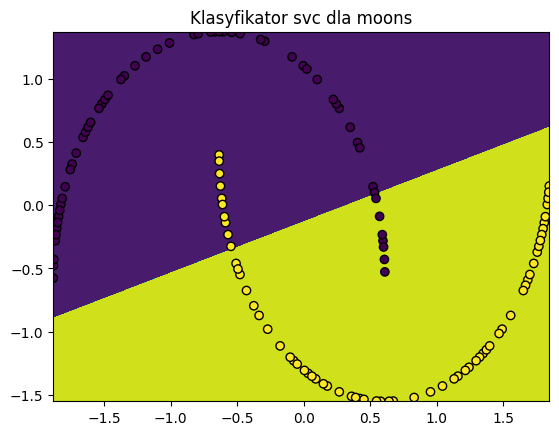

In [ ]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
y_pred[y_pred==-1]=0

print(f"ACCURACY dla  implementacji sklearn: {accuracy_score(y_test,y_pred)}")

plot_decision_boundary(X_test,y_test,svc,"Klasyfikator svc")
plt.show()

# Moons
svc=SVC(kernel='linear')
svc.fit(X_train_moons,y_train_moons)
y_pred=svc.predict(X_test_moons)
y_pred[y_pred==-1]=0
print(f"ACCURACY dla moons w implementacji sklearn: {accuracy_score(y_test_moons,y_pred)}")
plot_decision_boundary(X_test_moons,y_test_moons,svc,"Klasyfikator svc dla moons")

#%%[markdown]

 # Zadanie na 4 - własna implementacja svm w oparciu o funkcję jądra

ACCURACY dla zwykłej implementacji: 1.0


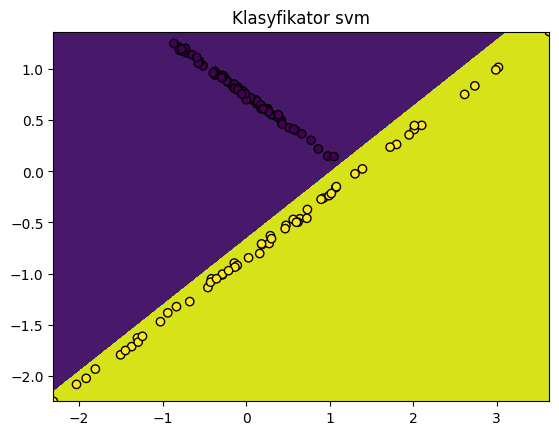

ACCURACY dla zwykłej implementacji moons: 0.856


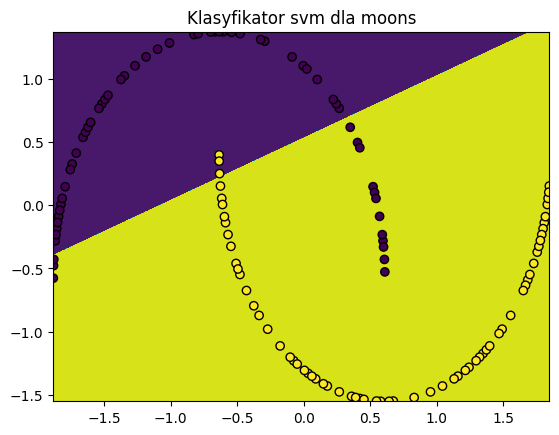

In [ ]:
class KernelSVM:
    def __init__(self,l=0.1,kernel='linear',sigma=0.1) -> None:
        self.l=l
        self.kernel=kernel
        self.sigma=sigma
    def _kernel(self,x1,x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2.T)
        elif self.kernel == 'rbf':
            gamma = 1 / (2 * self.sigma**2)
            return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)
        elif self.kernel=='poly':
            return (np.dot(x1,x2.T)+1)**3
        else:
            raise ValueError("Invalid kernel function. Choose 'linear', 'poly' or 'rbf'.")

    def fit(self,X,y):
        y_=np.where(y>0,1,-1)
        lambdas=np.full((X.shape[0],),0.01)
        def dual_form(lambdas):
            first_part = np.sum(lambdas)
            second_part = 0.5 * np.sum(np.array([lambdas[i] * lambdas[j] * y_[i] * y_[j] * self._kernel(X[i], X[j]) for j in range(len(lambdas))for i in range(len(lambdas))]))
          
            return -(first_part - 0.5 * second_part)
        bounds = [(0, None)] * len(lambdas)
        result=minimize(dual_form,lambdas,bounds=bounds)
        
        lambdas=result.x#np.maximum(result.x,0)
        self.lambdas=lambdas[lambdas>1e-5]
        self.x=X[lambdas>1e-5]
        self.y=y_[lambdas>1e-5]
        self.w=np.sum(np.array([self.lambdas[i]*self.y[i]*self.x[i,:] for i in range(len(self.lambdas))]),axis=0)
        self.b = self.y[0] - self.w@self.x[0].T

    def predict(self,X_test):
        result=np.zeros((X_test.shape[0]))
        for i in range(len(result)):
            for j in range(self.lambdas.shape[0]):
                result[i] += self.lambdas[j] * self.y[j] * self._kernel(X_test[i], self.x[j])
        return np.sign(result+self.b)

svm=KernelSVM(kernel='linear')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
y_pred[y_pred==-1]=0

print(f"ACCURACY dla zwykłej implementacji: {accuracy_score(y_test,y_pred)}")
plot_decision_boundary(X_test,y_test,svm,"Klasyfikator svm")
plt.show()

svm=KernelSVM(kernel='linear')
svm.fit(X_train_moons,y_train_moons)
y_pred=svm.predict(X_test_moons)
y_pred[y_pred==-1]=0

print(f"ACCURACY dla zwykłej implementacji moons: {accuracy_score(y_test_moons,y_pred)}")
plot_decision_boundary(X_test_moons,y_test_moons,svm,"Klasyfikator svm dla moons")
plt.show()


# svc_rbf=KernelSVM(kernel='rbf',sigma=3)
# svc_rbf.fit(X_train_moons,y_train_moons)
# y_pred=svc_rbf.predict(X_test_moons)
# y_pred[y_pred==-1]=0
# print(f"ACCURACY poly implementacji sklearn dla moons: {accuracy_score(y_test_moons,y_pred)}")
# plot_decision_boundary(X_test_moons,y_test_moons,svc_rbf,"Klasyfikator svc_rbf dla moons")
# plt.show()

#%%[markdown]

 # Zadanie na 4 - implementacja sklearn svm w oparciu o funkcję jądra
 Poly - zwykłe

ACCURACY poly  implementacji sklearn: 0.96


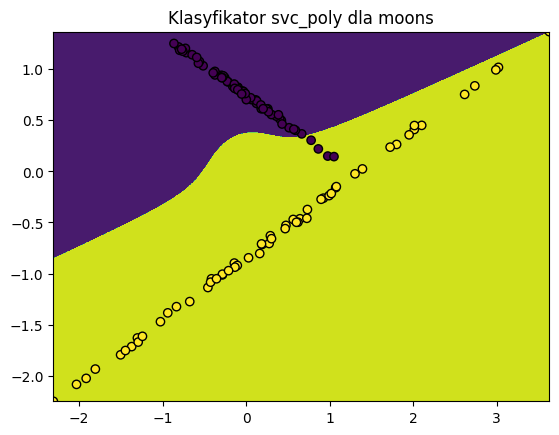

ACCURACY poly implementacji sklearn dla moons: 0.904


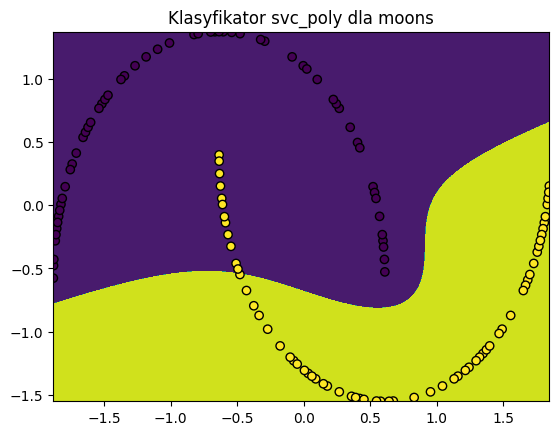

ACCURACY poly  implementacji sklearn: 0.984


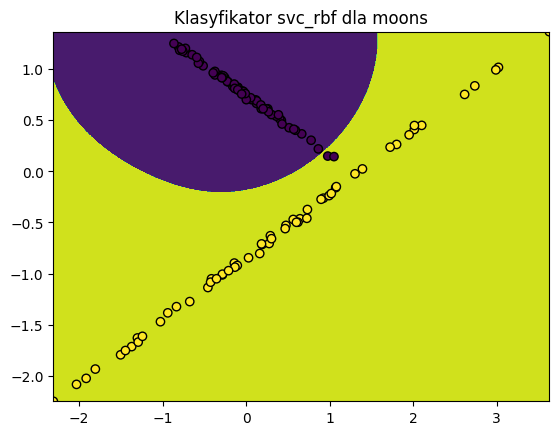

ACCURACY poly implementacji sklearn dla moons: 1.0


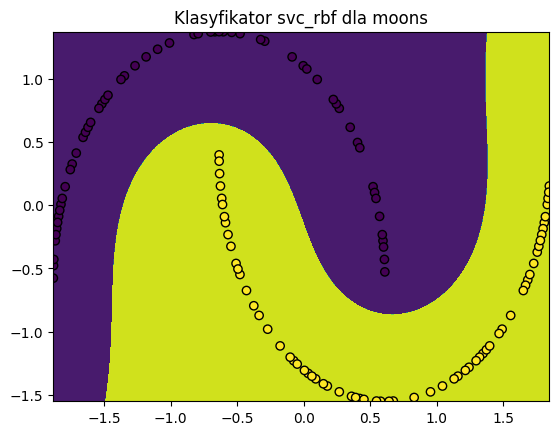

In [ ]:
svc_poly=SVC(kernel='poly')
svc_poly.fit(X_train,y_train)
y_pred=svc_poly.predict(X_test)
y_pred[y_pred==-1]=0
print(f"ACCURACY poly  implementacji sklearn: {accuracy_score(y_test,y_pred)}")
plot_decision_boundary(X_test,y_test,svc_poly,"Klasyfikator svc_poly dla moons")
plt.show()

# Poly - moons

svc_poly=SVC(kernel='poly')
svc_poly.fit(X_train_moons,y_train_moons)
y_pred=svc_poly.predict(X_test_moons)
y_pred[y_pred==-1]=0
print(f"ACCURACY poly implementacji sklearn dla moons: {accuracy_score(y_test_moons,y_pred)}")
plot_decision_boundary(X_test_moons,y_test_moons,svc_poly,"Klasyfikator svc_poly dla moons")
plt.show()

# Rbf - zwykłe
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(X_train,y_train)
y_pred=svc_rbf.predict(X_test)
y_pred[y_pred==-1]=0
print(f"ACCURACY poly  implementacji sklearn: {accuracy_score(y_test,y_pred)}")
plot_decision_boundary(X_test,y_test,svc_rbf,"Klasyfikator svc_rbf dla moons")
plt.show()

# Rbf - moons

svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(X_train_moons,y_train_moons)
y_pred=svc_rbf.predict(X_test_moons)
y_pred[y_pred==-1]=0
print(f"ACCURACY poly implementacji sklearn dla moons: {accuracy_score(y_test_moons,y_pred)}")
plot_decision_boundary(X_test_moons,y_test_moons,svc_rbf,"Klasyfikator svc_rbf dla moons")
plt.show()

#%%[markdown]

 # Zadanie na 4 - własna implementacja svm w oparciu o funkcję jądra
poly

#%%[markdown]

 # Zadanie na 5

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate'], dtype='object')


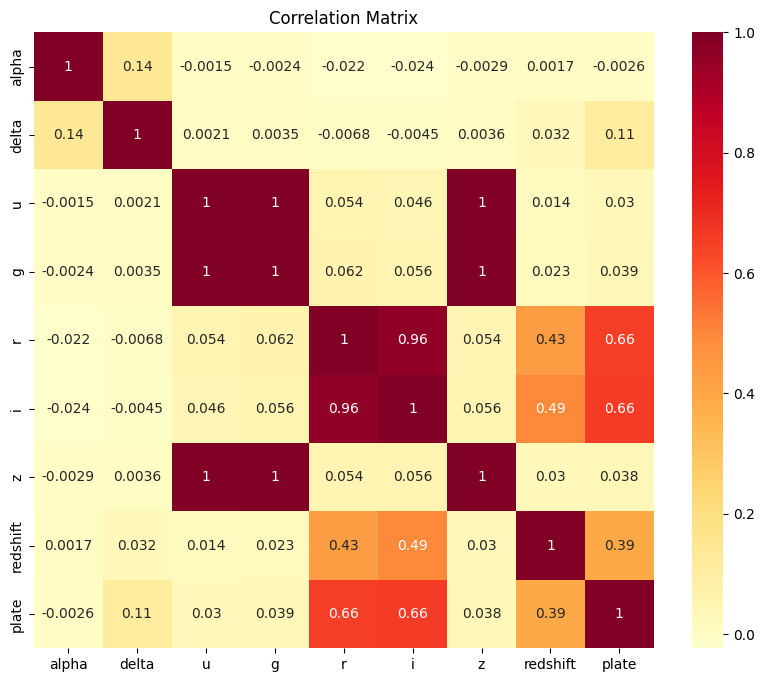

In [ ]:
import seaborn as sns
df = pd.read_csv('star_classification.csv')

#Preprocessing
df=df.drop(["cam_col","MJD"],axis=1)
df=df.drop([col for col in df.columns if col.endswith("_ID") ],axis=1)

numerical_columns=df.select_dtypes(include=["int64","float64"]).columns
print(numerical_columns)
#Macierz korelacji
correlation_matrix=df[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

#Normalizacja danych
scaler=StandardScaler()
df[numerical_columns]=scaler.fit_transform(df[numerical_columns])

df=df[np.isin(df["class"],["GALAXY","STAR"])]
t=np.array(df["class"])#1 - GALAXY -1 - STAR
t=np.where(t=="GALAXY",1,-1)
X=df.drop("class",axis=1)
X=X[["u","g"]]

#%%[markdown]

 # Zadanie na 5

ACCURACY : 0.7291707798617967
	SVM dla zbioru Stellar Classification Dataset

          	accuracy: 0.7291707798617967

          	sensitivity: 0.7291707798617967

          	specificity: nan
        


<ipython-input-172-8868fb4e0232>:27: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity=tn/(tn+fn)


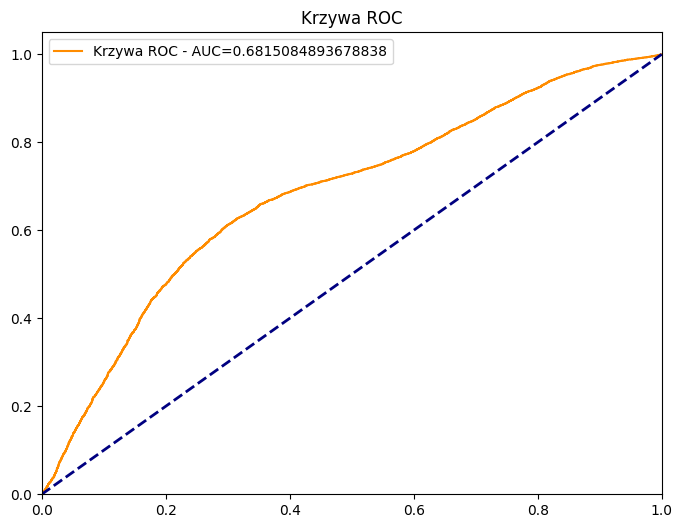

ACCURACY : 0.7291707798617967
	SVM dla zbioru Stellar Classification Dataset

          	accuracy: 0.7291707798617967

          	sensitivity: 0.7291707798617967

          	specificity: nan
        


<ipython-input-172-8868fb4e0232>:27: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity=tn/(tn+fn)


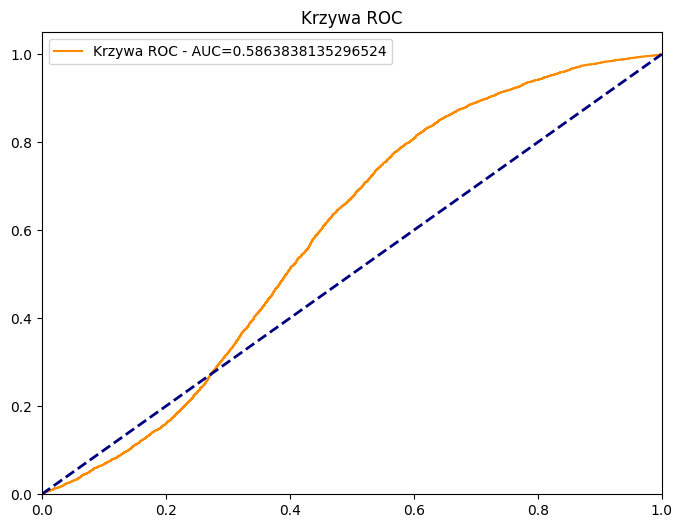

ACCURACY : 0.7291707798617967
	SVM dla zbioru Stellar Classification Dataset

          	accuracy: 0.7291707798617967

          	sensitivity: 0.7291707798617967

          	specificity: nan
        


<ipython-input-172-8868fb4e0232>:27: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity=tn/(tn+fn)


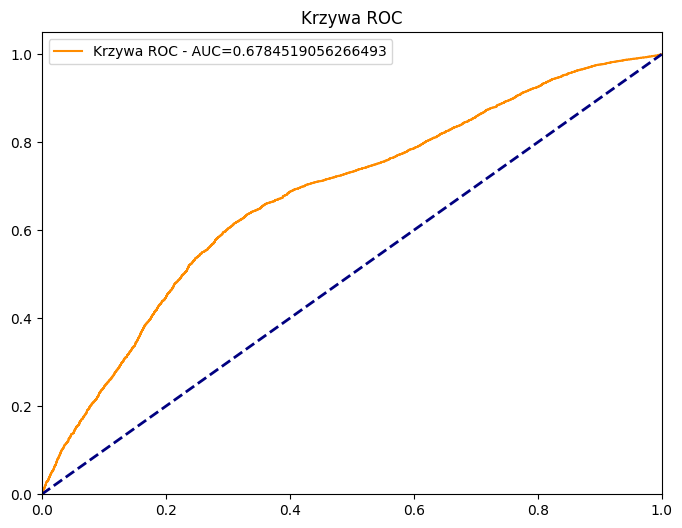

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,t)
parameters=[(1,"linear"),(1,'rbf'),(0.5,'poly')]
for C,kernel in parameters:
    svm=SVC(C=C,kernel=kernel)
    svm.fit(X_train,y_train)
    y_pred=svm.predict(X_test)
    y_score=svm.decision_function(X_test)
    print(f"ACCURACY : {accuracy_score(y_test,y_pred)}")
    display_classifier_details(y_pred,y_test,"SVM dla zbioru Stellar Classification Dataset")
    plot_roc_curve(y_test,y_score)
    plt.show()

ACCURACY poly dla własnej implementacji: 0.9


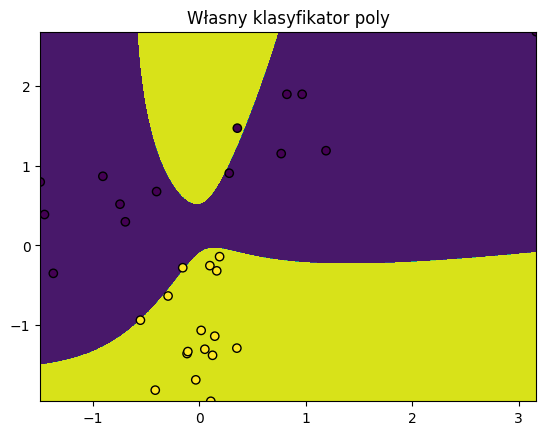

ACCURACY poly dla własnej implementacji dla moons: 1.0


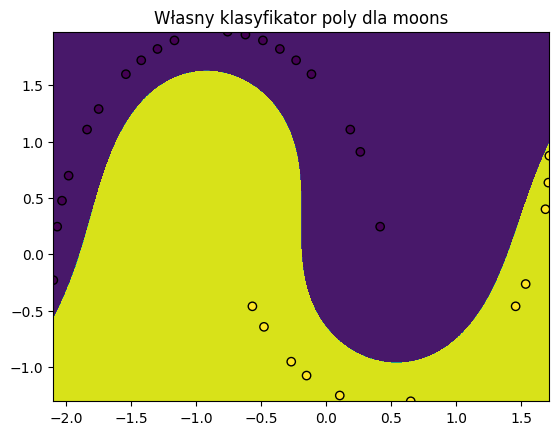

ACCURACY rbf dla własnej  implementacji: 0.5333333333333333


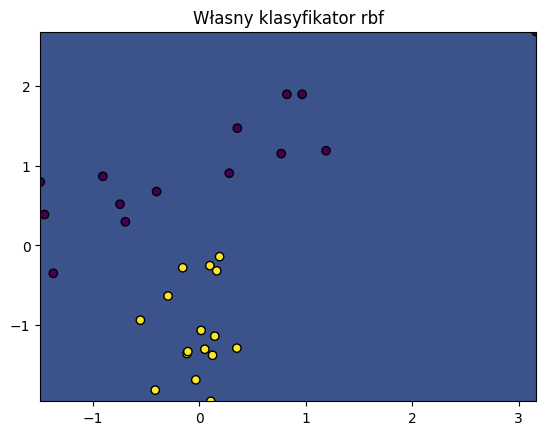

ACCURACY rbf implementacji własnej dla moons: 0.6333333333333333


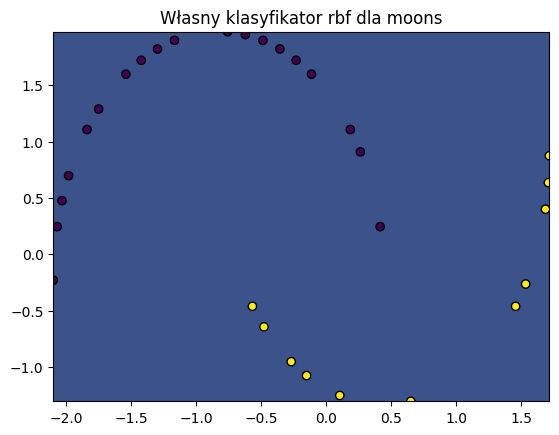

In [ ]:
svc_rbf=KernelSVM(kernel='poly')
svc_rbf.fit(X_train,y_train)
y_pred=svc_rbf.predict(X_test)
y_pred[y_pred==-1]=0
print(f"ACCURACY poly dla własnej implementacji: {accuracy_score(y_test,y_pred)}")
plot_decision_boundary(X_test,y_test,svc_rbf,"Własny klasyfikator poly")
plt.show()


#poly - moons
svc_rbf=KernelSVM(kernel='poly')
svc_rbf.fit(X_train_moons,y_train_moons)
y_pred=svc_rbf.predict(X_test_moons)
y_pred[y_pred==-1]=0
print(f"ACCURACY poly dla własnej implementacji dla moons: {accuracy_score(y_test_moons,y_pred)}")
plot_decision_boundary(X_test_moons,y_test_moons,svc_rbf,"Własny klasyfikator poly dla moons")
plt.show()


#rbf
svc_rbf=KernelSVM(kernel='rbf',sigma=10)
svc_rbf.fit(X_train,y_train)
y_pred=svc_rbf.predict(X_test)
y_pred[y_pred==-1]=0
print(f"ACCURACY rbf dla własnej  implementacji: {accuracy_score(y_test,y_pred)}")
plot_decision_boundary(X_test,y_test,svc_rbf,"Własny klasyfikator rbf")
plt.show()


#rbf - moons
svc_rbf=KernelSVM(kernel='rbf',sigma=10)
svc_rbf.fit(X_train_moons,y_train_moons)
y_pred=svc_rbf.predict(X_test_moons)
y_pred[y_pred==-1]=0
print(f"ACCURACY rbf implementacji własnej dla moons: {accuracy_score(y_test_moons,y_pred)}")
plot_decision_boundary(X_test_moons,y_test_moons,svc_rbf,"Własny klasyfikator rbf dla moons")
plt.show()

 # Zadanie na 5

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate'], dtype='object')


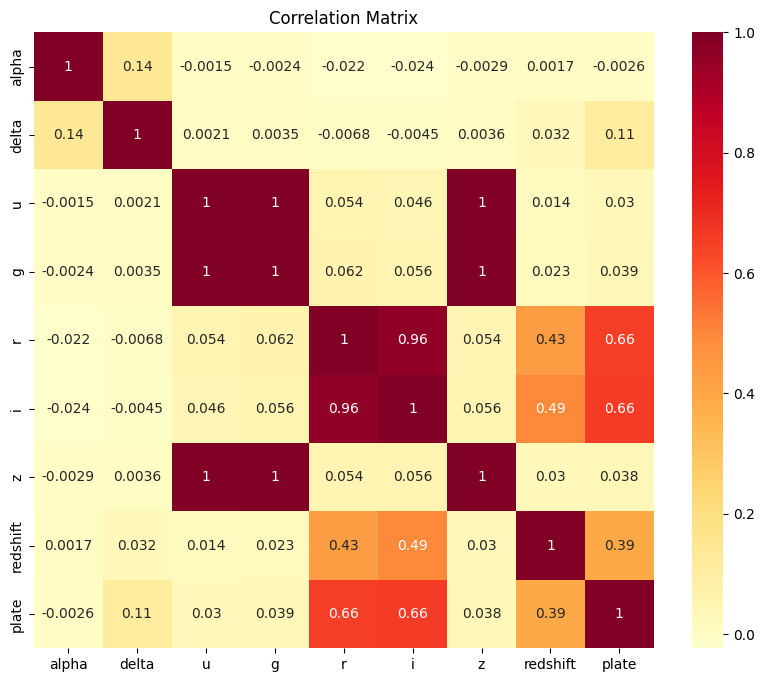

In [ ]:
import seaborn as sns
df = pd.read_csv('star_classification.csv')

#Preprocessing
df=df.drop(["cam_col","MJD"],axis=1)
df=df.drop([col for col in df.columns if col.endswith("_ID") ],axis=1)

numerical_columns=df.select_dtypes(include=["int64","float64"]).columns
print(numerical_columns)
#Macierz korelacji
correlation_matrix=df[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

#Normalizacja danych
scaler=StandardScaler()
df[numerical_columns]=scaler.fit_transform(df[numerical_columns])

df=df[np.isin(df["class"],["GALAXY","STAR"])]
t=np.array(df["class"])#1 - GALAXY -1 - STAR
t=np.where(t=="GALAXY",1,-1)
X=df.drop("class",axis=1)
X=X[["u","g"]]

  # Importowanie bibliotek

 # Zadanie na 5

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate'], dtype='object')


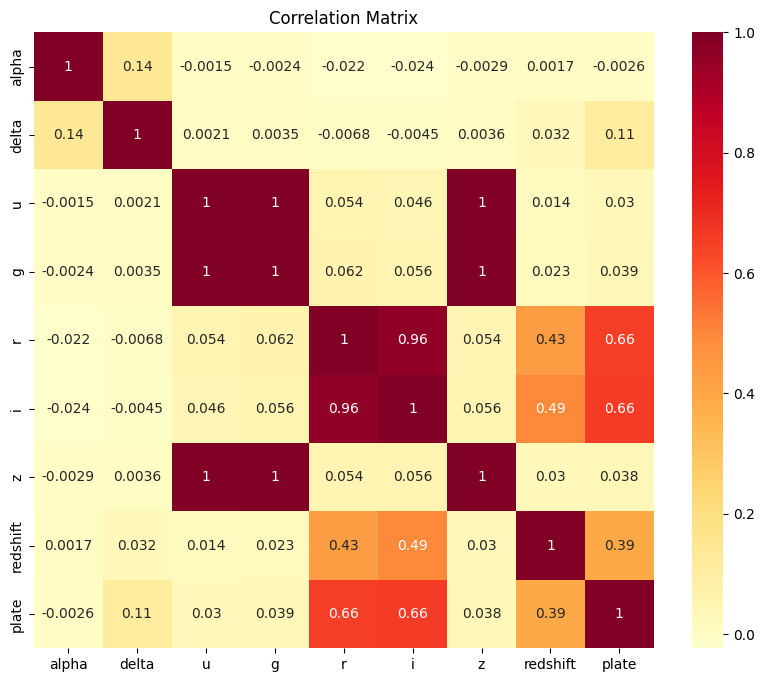

In [ ]:
import seaborn as sns
df = pd.read_csv('star_classification.csv')

#Preprocessing
df=df.drop(["cam_col","MJD"],axis=1)
df=df.drop([col for col in df.columns if col.endswith("_ID") ],axis=1)

numerical_columns=df.select_dtypes(include=["int64","float64"]).columns
print(numerical_columns)
#Macierz korelacji
correlation_matrix=df[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

#Normalizacja danych
scaler=StandardScaler()
df[numerical_columns]=scaler.fit_transform(df[numerical_columns])

df=df[np.isin(df["class"],["GALAXY","STAR"])]
t=np.array(df["class"])#1 - GALAXY -1 - STAR
t=np.where(t=="GALAXY",1,-1)
X=df.drop("class",axis=1)
X=X[["u","g"]]

In [ ]:
from sklearn.model_selection import GridSearchCV
svm=SVC()

clf=GridSearchCV(svm,{'kernel':('poly', 'rbf'), 'C':[1, 5]})
clf.fit(X,t)
print(clf.best_estimator_)
print(clf.best_params_)

ACCURACY : 0.7765547877591313
	SVM dla zbioru Stellar Classification Dataset

          	accuracy: 0.7765547877591313

          	sensitivity: 0.7822439131388462

          	specificity: 0.7252964426877471
        


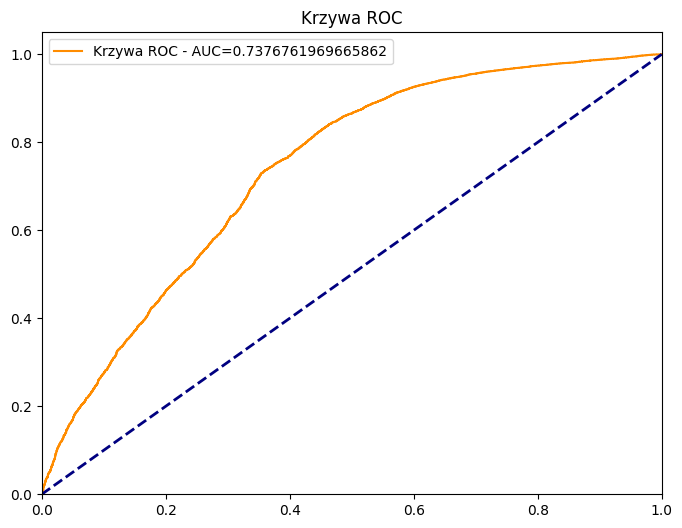

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,t)


svm=SVC(kernel='rbf',C=1)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
y_score=svm.decision_function(X_test)
print(f"ACCURACY : {accuracy_score(y_test,y_pred)}")
display_classifier_details(y_pred,y_test,"SVM dla zbioru Stellar Classification Dataset")
plot_roc_curve(y_test,y_score)
plt.show()